# Logistic Regression, Cross Entropy Cost, Perceptron Cost, and Evaluation Metrics


Please run the cell below to import libraries needed for this project.

In [1]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
%matplotlib inline

Q1) Implement the sigmod function. The function takes a value, x, as input and returns the sigmoid function applied to the value.

In [2]:
def sigmoid(x):
    y = 1/(1 + np.exp(-x))
    return y

Q2) Implement the logistic regression model and the cross entropy cost function. Note that the logistic regression model relies on the sigmoid function (which you have implemented above) and the linear  model (which you have implemented in HW2). You can use the linear model from HW2 for this problem. Similar to the least-squares cost, the cross entropy cost takes in as input an array of weights, w, an array of x's and an array of ys and return a float indicating the total cost.

In [3]:
# Your linear model from HW2
def model(x,w):
    y = w[0] + np.dot(x.T, w[1:])
    return y

# The logistic regression cross entropy cost
def cross_entropy(w,x,y):
    # calculate predicted ys
    y_predicted = sigmoid(model(x,w))

    # calculate the cross entropy cost when y=0
    y_zeros = np.argwhere(y==0)[:,1]
    cost = np.sum(np.log(1 - y_predicted[y_zeros]))

    # calculate the cross entropy cost when y=1
    y_ones = np.argwhere(y==1)[:,1]
    cost += np.sum(np.log(y_predicted[y_ones]))

    # divide by the number of points and negate the sum
    cost = (-1)*(cost/y.size)
    return cost

Run the code below to read a data file and plot a scatter plot of x vs y.

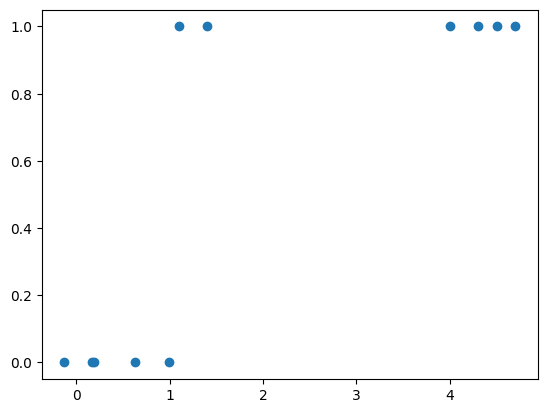

In [4]:
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

plt.scatter(x,y)

Q3) Implement a gradient descent function. Run the function using the cross_entropy cost and the x and y from above. The parameters should be set to: max_its=1500,w=[3.0,3.0 ], and alpha=1. Save the cost and weight history returned by the gradient descent function. Plot the cost history.


In [5]:
##gradient descent
def gradient_descent(g,alpha,max_its,w,x,y):
    gradient = grad(g)
    weights = np.array(w)
    weight_history = np.array([weights])
    cost_history = [g(w,x,y)]

    for i in range(max_its):
      step = gradient(weights, x, y)

      for k in range (len(weights)):
        weights[k] -= (alpha * step[k])

      weight_history = np.insert(np.array(weight_history), i+1, np.array(weights), axis=0)
      cost = g(weights, x, y)
      cost_history.append(cost)
    return weight_history, cost_history

Text(0.5, 1.0, 'cost history')

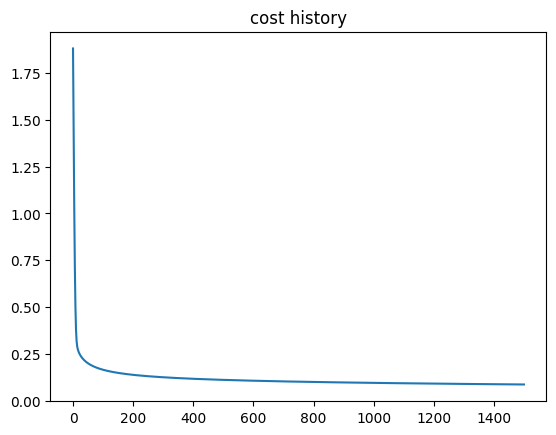

In [6]:
##Call the gradient_descent function here
max_its = 1500
w = np.array([3.0,3.0])
alpha = 1
weight_history, cost_history = gradient_descent(cross_entropy, alpha, max_its, w, x, y)

##Plot the cost history here
plt.plot(cost_history)
plt.title("cost history")

Q4) Implement a logistic regression classifier that takes in the learned weights and x as input and returns the probability of the positive class (note that this is just the output of the sigmoid applied to the linear combination of the x and w)

In [7]:
def logistic_regression(learned_w,x):
    y_predicted = model(x, learned_w)
    positive_class_prob = sigmoid(y_predicted)
    return positive_class_prob

Q5) Use the learned weights from the last gradient descent run and the logistic regression function implemented above to plot the learned curve. You can use the linspace method (shown below) to generate a list of xs that you can use. You need to generate a y for each of the candidate xs using the logistic regression function and the learned weights. On the same figure, also plot the scatter plot from before.


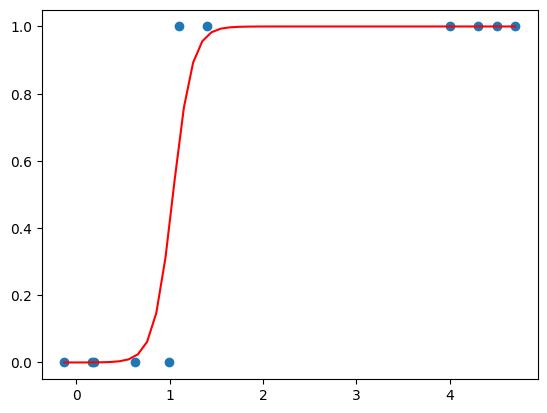

In [8]:
# using the linspace method to generate a list of xs that I can use for plotting
s = np.linspace(np.min(x),np.max(x))

# picking the weights with the lowest cost
minimum_cost_index = np.argmin(cost_history)
learned_weights = weight_history[minimum_cost_index]
candidate_ys = []

# generating a y for each of the candidate xs using the learned weights and the logistic regression function
for element in s:
  candidate_ys.append(logistic_regression(learned_weights, element))

# plot the learned curve and the scatter plot from above
plt.plot(s, candidate_ys, color = "red")
plt.scatter(x,y)
plt.show()

Q6) Slightly modify the logistic regression model above so that it returns a 1 or 0 based on the specified threshold.

In [9]:
def logistic_regression_modified(learned_w, x, threshold):
    # calculate predicted ys
    y_predicted = []
    positive_class_prob = []

    for element in x:
      y_predicted.append(model(element, learned_w))
      # calculate class probability
      positive_class_prob.append(sigmoid(element))

    class_label = []
    # modify the probability based on the threshold
    for prob in positive_class_prob:
        if prob >= threshold:
          class_label.append(1)
        if prob < threshold:
          class_label.append(0)

    class_label = np.array(class_label)
    return class_label

Q7) Write a function (called evaluate) that takes in actual and predicted ys (for a binary classification problem) and return a confusion matrix and the accuracy. Use the modified logistic regression model and the evaluate function below to report the confusion matrix and accuracy for the x and y used for our training at a threshold of 0.5.  

In [10]:
from sklearn.metrics import confusion_matrix

def evaluate(y_actual,y_pred):
    # confusion matrix
    confusion_matrix_result = confusion_matrix(y_actual, y_pred, labels=[1,0])

    true_negative = confusion_matrix_result[0][0]
    false_positive = confusion_matrix_result[0][1]
    false_negative = confusion_matrix_result[1][0]
    true_positive = confusion_matrix_result[1][1]

    # accuracy of the model
    accuracy = (true_positive + true_negative)/(true_positive + false_positive + false_negative + true_negative)

    return false_positive, false_negative, true_positive, true_negative, accuracy

# report the confusion matrix and accuracy for the x and y used for our training
threshold = 0.5

# generating a y for each of the candidate xs using the learned weights and the modified logistic regression function
candidate_ys = (logistic_regression_modified(learned_weights, x[0], threshold))

# report the confusion matrix and accuracy for the x and y used for our training
false_positive, false_negative, true_positive, true_negative, accuracy = evaluate(y[0], candidate_ys)

print("true negative", true_negative)
print("false positive: ", false_positive)
print("false negative: ", false_negative)
print("true positive: ", true_positive)
print("confusion matrix is:")
print("[[", true_negative, false_positive, "]")
print(" [", false_negative, true_positive, "]]")
print("accuracy is: ", accuracy)

true negative 6
false positive:  0
false negative:  4
true positive:  1
confusion matrix is:
[[ 6 0 ]
 [ 4 1 ]]
accuracy is:  0.6363636363636364


Q8) Implement the perceptron cost function from the class (the softmax version). Note that the perceptron cost also uses the linear model (the model function from question 2).

In [11]:
def perceptron_cost(w,x,y):
  # calculate predicted values
  y_predicted = model(x, w)
  cost = 0

  # loop over all the points
  for i in range(y_predicted.size):
      # add up the cost of each point
      cost += np.log(1 + np.exp(-y[0][i]*y_predicted[i]))

  return cost

Q9)
* Run gradient descent function using the perceptron cost and the x and y from above and the parameters set to: max_its=1500,w=[1.0,1.0], and alpha=1.0.
* Save the cost and weight history returned by the gradient descent function.
* Plot the cost history.
* Answer: Which cost seems to do better on this dataset? Why do think that is?


Text(0.5, 1.0, 'cost history')

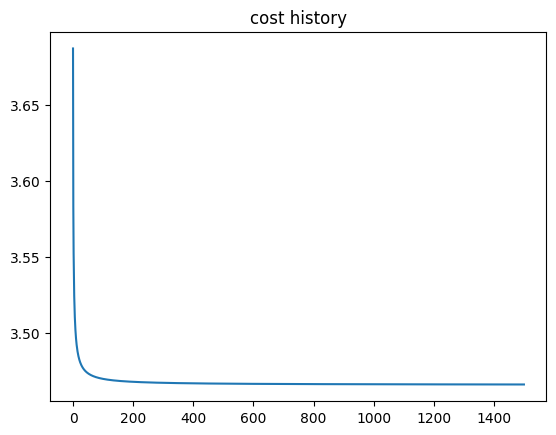

In [12]:
##Call the gradient_descent function here
max_its = 1500
w = np.array([1.0, 1.0])
alpha = 1.0
weight_history, cost_history = gradient_descent(perceptron_cost, alpha, max_its, w, x, y)

##Plot the cost history here
plt.plot(cost_history)
plt.title("cost history")

solely looking at the cost history, it seems like the softmax perceptron cost function does better on this data set because it converges to its lowest cost way faster than the cross entropy does. For the softmax perceptron cost function, the graph converges to its lowest cost at around iteration number 100, whereas for the cross entropy cost function, the data converges to its lowest cost between iteration number 200 and 400.

Q10) The file 'heart.csv' has 304 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns.

* Read the data file. (Note that the first line is the header describing each column.)
* Use the data above to set y to be the "target" and X to be the remaining columns.
* Split your data into 80% train 20% test using train_test_split.
* Use sklearn to fit a logistic regression model on your training set. Use all the default parameters. Do not evaluate at this point.

In [13]:
## import logistic regression and the train_test split functions from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

train_data = pd.read_csv("/content/heart.csv")
# get first row using row position
print(train_data.iloc[0])
X = train_data[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]]
y = train_data["target"]

# split your data into 80% train 20% test using train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# fit a logistic regression model on your training set
# use all the default parameters
log_reg = LogisticRegression(max_iter=1000)
log_reg_model = log_reg.fit(x_train, y_train)

age          63.0
sex           1.0
cp            3.0
trestbps    145.0
chol        233.0
fbs           1.0
restecg       0.0
thalach     150.0
exang         0.0
oldpeak       2.3
slope         0.0
ca            0.0
thal          1.0
target        1.0
Name: 0, dtype: float64


Q11) Use the .predict_proba function of the logistic regression model that you have learned on your X_test. Note that the .predict_proba function returns an array of tuples where each element corresponds to the predicted probability for class 0 and 1 of the data point.

In [14]:
probability = log_reg_model.predict_proba(x_test)

Q12) Now you will report your results.

* Filter the predicted probabilties from the last question to an array containing only the probabilites for class 1. (I.e., you should no longer have tuples.)
* Use the roc_curve function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to plot the ROC curve for your predictions using the predicted probabilities for class 1 and your y_test (use the default parameters).
* Print out the thresholds generated by the roc_curve function.
* Use the roc_auc_score function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to report the AUC score.

In [15]:
# filter the predicted probabilties from the last question
# to an array containing only the probabilites for class 1
probability_class_1 = []
for pair in probability:
    probability_class_1.append(pair[1])

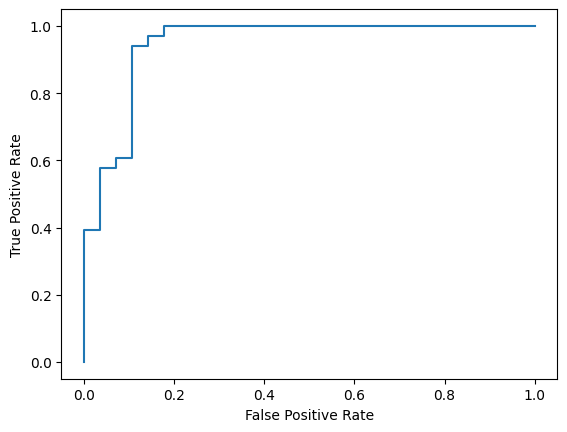

In [16]:
# use the roc_curve function to plot the ROC curve for your predictions
# using the predicted probabilities for class 1 and your y_test
# use the default parameters
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probability_class_1)

#create ROC curve
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
# print out the thresholds generated by the roc_curve function
print(thresholds)

[1.99526147 0.99526147 0.91865195 0.91760673 0.82238161 0.81002449
 0.79493756 0.77211056 0.62603436 0.60134098 0.5980171  0.53938676
 0.52355112 0.00695091]


In [18]:
# use the roc_auc_score function
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probability_class_1)
print("ROC AUC score is", auc)

ROC AUC score is 0.9458874458874459
